In [16]:
# ! pip install kmodes
# ! pip install dexplot

import pandas as pd
import numpy as np

from kmodes.kmodes import KModes
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import dexplot as dxp

In [17]:
df_address = pd.read_csv('data/hackaton.csv').dropna()

In [18]:
df_address['date'] = pd.to_datetime(df_address['date'], format='%d/%m/%Y')

In [19]:
df_address = df_address.query('date>2018').sample(10_000)

In [20]:
len(df_address)

10000

In [21]:
def amount_classes(amount):
    if amount < 100_000:
        return '50_000-100_000'
    elif amount < 150_000:
        return '100_000-150_000'
    elif amount < 200_000:
        return '150_000-200_000'
    elif amount < 250_000:
        return '200_000-250_000'
    elif amount < 300_000:
        return '250_000-300_000'
    elif amount < 350_000:
        return '300_000-350_000'
    elif amount < 400_000:
        return '350_000-400_000'
    elif amount < 500_000:
        return '400_000-500_000'
    elif amount < 750_000:
        return '500_000-750_000'
    elif amount < 1_000_000:
        return '750_000-1_000_000'
    elif amount < 1_500_000:
        return '1_000_000-1_500_000'
    elif amount <= 5_000_000:
        return '1_500_000-5_000_000'

def build_year_classes(year):
    if year < 1850:
        return '1050-1850'
    elif year < 1905:
        return '1850-1905'
    elif year < 1925:
        return '1905-1925'
    elif year < 1945:
        return '1925-1945'
    elif year < 1955:
        return '1945-1955'
    elif year < 1965:
        return '1955-1965'
    elif year < 1975:
        return '1965-1975'
    elif year < 1985:
        return '1975-1985'
    elif year < 1995:
        return '1985-1995'
    elif year < 2005:
        return '1995-2005'
    elif year < 2015:
        return '2005-2015'
    else:
        return '2015-2020'

def use_surface_classes(use_surface):
    if use_surface < 50:
        return '-50 m2'
    elif use_surface < 75:
        return '50-75 m2'
    elif use_surface < 100:
        return '75-100 m2'
    elif use_surface < 150:
        return '100-150 m2'
    elif use_surface < 250:
        return '150-250 m2'
    else:
        return '250+'

def parcel_surface_classes(parcel_surface):
    if parcel_surface < 50:
        return '-50 m2'
    elif parcel_surface < 100:
        return '50-100 m2'
    elif parcel_surface < 250:
        return '100-250 m2'
    elif parcel_surface < 500:
        return '250-500 m2'
    elif parcel_surface < 1000:
        return '500-1000 m2'
    else:
        return '1000+'

def number_of_objects_classes(n):
    if n == 1:
        return '1'
    elif n < 5:
        return '1-5'
    elif n < 10:
        return '5-10'
    else:
        return '10+'

In [22]:
df = df_address.copy()

In [23]:
df['amount'] = df['amount'].apply(amount_classes)
df['build_year'] = df['build_year'].apply(build_year_classes)
df['use_surface'] = df['use_surface'].apply(use_surface_classes)
df['parcel_surface'] = df['parcel_surface'].apply(parcel_surface_classes)
df['number_of_objects'] = df['number_of_objects'].apply(number_of_objects_classes)

In [24]:
km = KModes(n_clusters=2, init='Cao', verbose=1)
df['clusters'] = km.fit_predict(np.array(
    df[['amount', 'build_year', 'build_type', 'use_surface', 'parcel_surface', 'energy_label', 'number_of_objects']]))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 40680.0


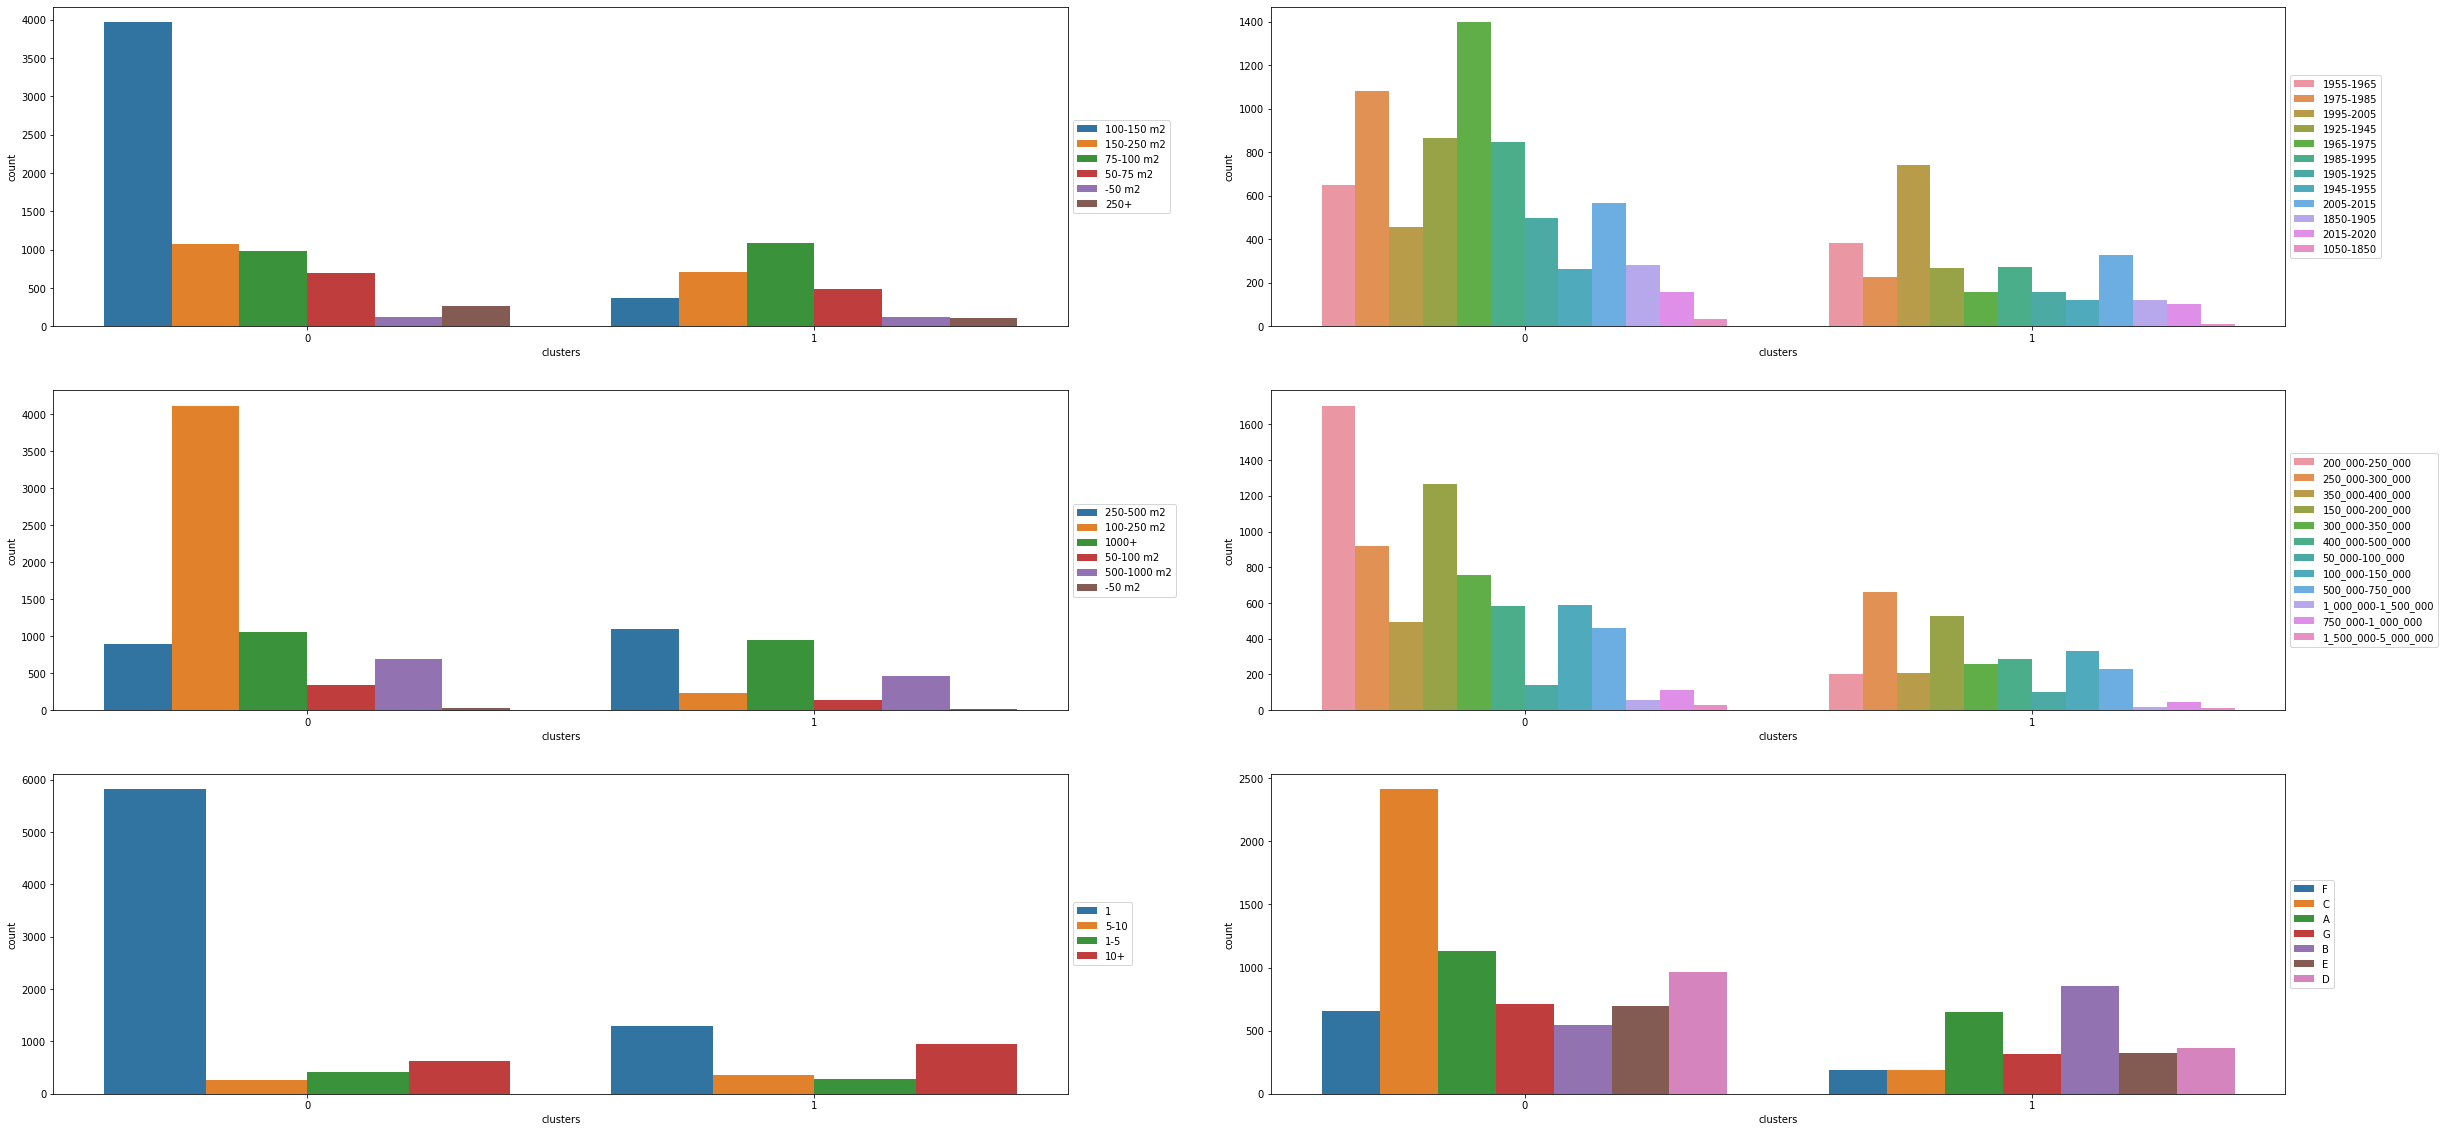

In [25]:
f, ax = plt.subplots(3, 2, figsize=(40, 20))
sns.countplot(x="clusters", hue="use_surface", data=df, ax=ax[0, 0])
sns.countplot(x="clusters", hue="build_year", data=df, ax=ax[0, 1])
sns.countplot(x="clusters", hue="parcel_surface", data=df, ax=ax[1, 0])
sns.countplot(x="clusters", hue="amount", data=df, ax=ax[1, 1])
sns.countplot(x="clusters", hue="number_of_objects", data=df, ax=ax[2, 0])
sns.countplot(x="clusters", hue="energy_label", data=df, ax=ax[2, 1])

for i in ax:
    i[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    i[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show();

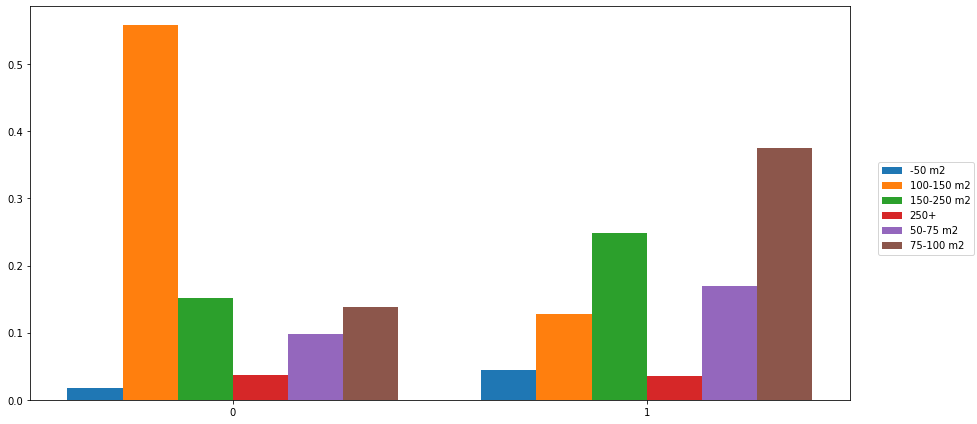

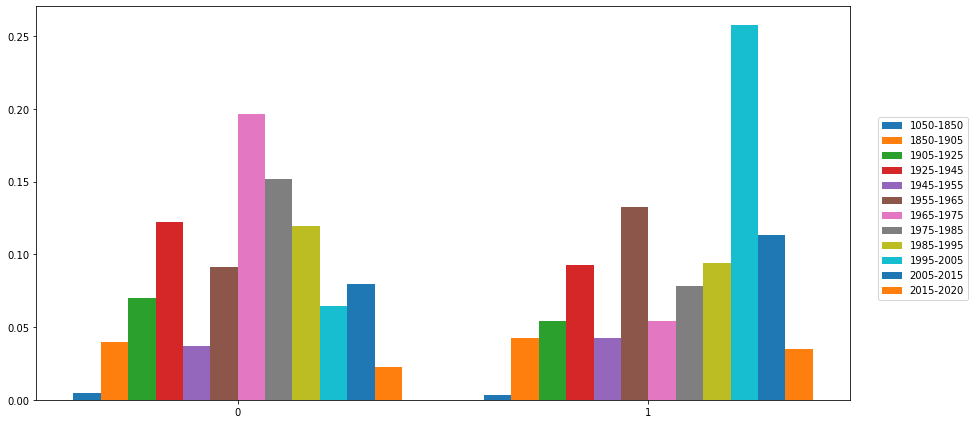

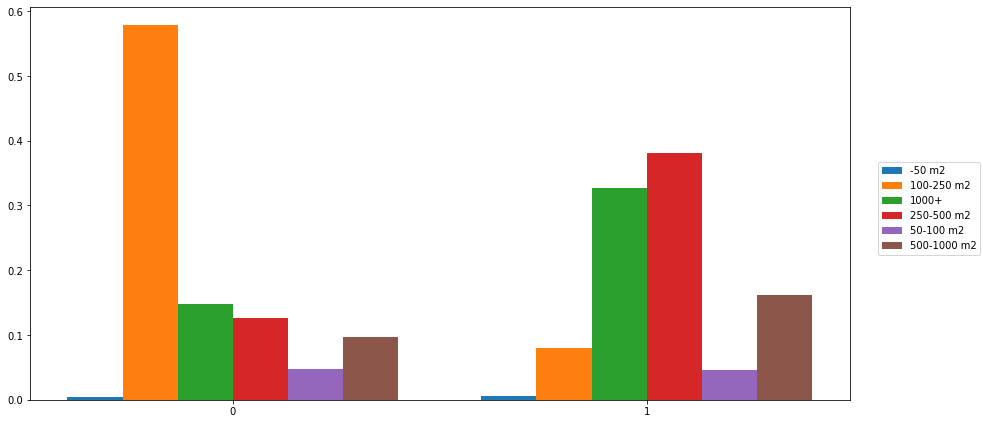

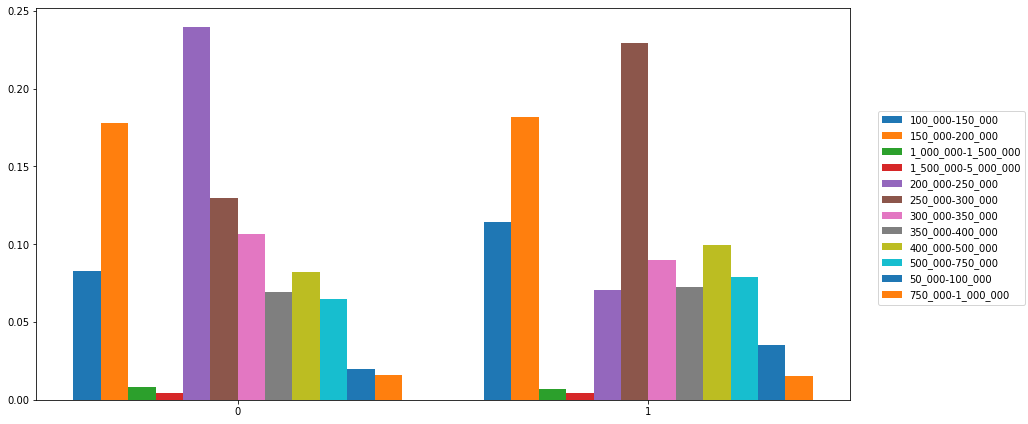

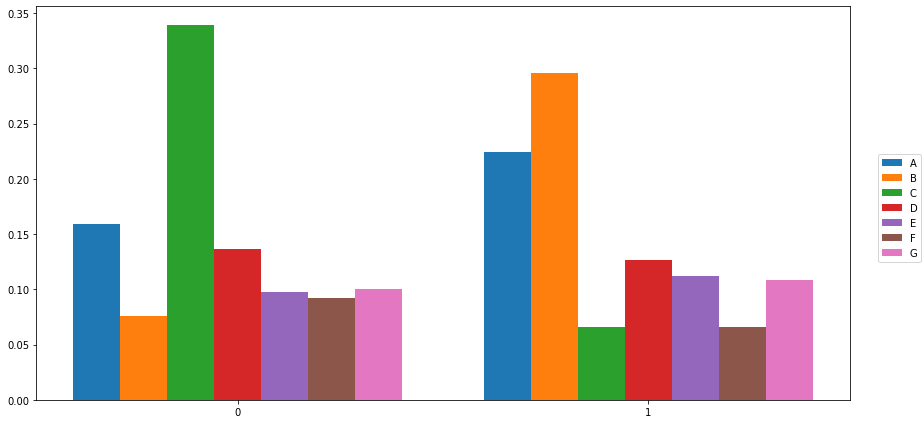

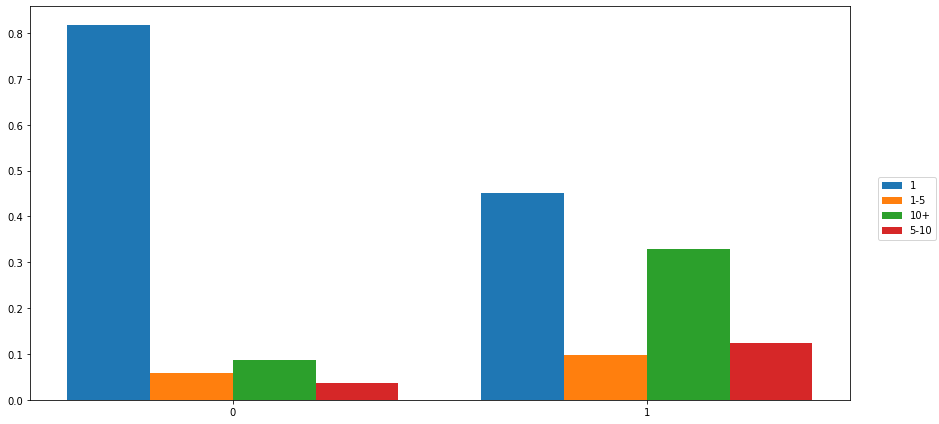

In [26]:
dxp.aggplot(agg='clusters', data=df.astype({'clusters': str}), hue='use_surface', normalize='clusters')
dxp.aggplot(agg='clusters', data=df.astype({'clusters': str}), hue='build_year', normalize='clusters')
dxp.aggplot(agg='clusters', data=df.astype({'clusters': str}), hue='parcel_surface', normalize='clusters')
dxp.aggplot(agg='clusters', data=df.astype({'clusters': str}), hue='amount', normalize='clusters')
dxp.aggplot(agg='clusters', data=df.astype({'clusters': str}), hue='energy_label', normalize='clusters')
dxp.aggplot(agg='clusters', data=df.astype({'clusters': str}), hue='number_of_objects', normalize='clusters')

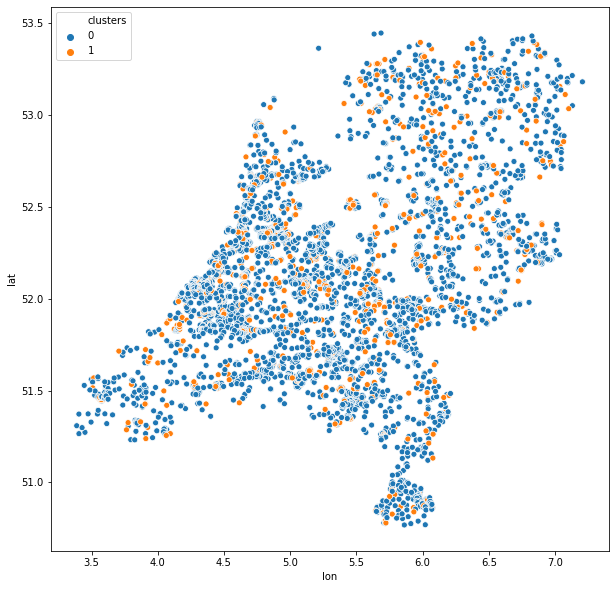

In [27]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x="lon", y="lat", hue="clusters", 
                data=df.groupby('buurt_code').mean().assign(clusters=lambda x: x['clusters'].astype(int)), ax=ax)
plt.show();

In [28]:
l_enc = LabelEncoder()
pca = PCA(n_components=2)
cat = ['amount', 'build_year', 'build_type', 'use_surface', 'parcel_surface', 'energy_label', 'number_of_objects']
df[cat] = df[cat].apply(l_enc.fit_transform)
pca_comp = np.transpose(pca.fit_transform(df[['amount', 'build_year', 'build_type', 'use_surface', 'parcel_surface', 'energy_label', 'number_of_objects']]))

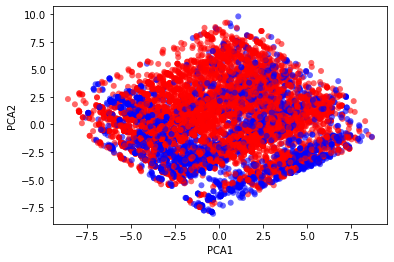

In [29]:
colors = {0: 'red', 1:'blue', 2: 'green', 3: 'yellow'}
plt.scatter(pca_comp[0], pca_comp[1], c=df['clusters'].map(colors), edgecolor='none', alpha=0.6)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show();